1 - Dados de Anúncios de TV x Vendas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('ads.xlsx')

Verificação de Dados entre as tabelas 

In [3]:
print(df)

       TV  Sales
0    2301    221
1     445    104
2     172     12
3    1515    165
4    1808    179
5      87     72
6     575    118
7    1202    132
8      86     48
9    1998    156
10    661    126
11   2147    174
12    238     92
13    975    137
14   2041     19
15   1954    224
16    678    125
17   2814    244
18    692    113
19   1473    146
20   2184     18
21   2374    175
22    132     56
23   2283    205
24    623     97
25   2629     17
26   1429     15
27   2401    209
28   2488    189
29    706    105
..    ...    ...
170    50     84
171  1645    175
172   196     76
173  1684    167
174  2224    165
175  2769     27
176  2484    202
177  1702    167
178  2767    168
179  1656    176
180  1566    155
181  2185    172
182   562     87
183  2876    262
184  2538    176
185   205    226
186  1395    103
187  1911    173
188   286    209
189   187     67
190   395    108
191   755    119
192   172     59
193  1668    196
194  1497    173
195   382     76
196   942     

Verificação dos dados com relação as vendas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null int64
Sales    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [5]:
df.dtypes

TV       int64
Sales    int64
dtype: object

Foi necessário converter preços que o Jupyter assumiu no formato Inteiro e para float com casas decimais

In [6]:
df['TV'] = df['TV'].values.astype(np.float)

In [7]:
df['Sales'] = df['Sales'].values.astype(np.float)

In [8]:
df.head(5)

,TV,Sales
0,2301.0,221.0
1,445.0,104.0
2,172.0,12.0
3,1515.0,165.0
4,1808.0,179.0


In [9]:
df.describe()

,TV,Sales
count,200.000000,200.00000
mean,1391.270000,136.00500
std,895.330745,67.14557
min,7.000000,7.00000
25%,616.250000,94.75000
50%,1394.000000,146.00000
75%,2170.250000,185.25000
max,2964.000000,262.00000


In [10]:
df.var()

TV       801617.142814
Sales      4508.527613
dtype: float64

Algoritmo de Tipo de Correção, sendo nulo, positivo ou negativo e sua força

In [11]:
def tipoDeCorrelacao(correlacao):
    if correlacao == 0: 
        print('Nao existe Correlacao')
    elif correlacao < 0: 
        print('Correlacao Linear Negativa Perfeita')
    else: 
        print('Correlacao Linear Positiva Perfeita')
    if correlacao < 0: 
        correlacao = - 1 * correlacao
    if 0.0 >= correlacao <= 0.19: 
        return 'Uma correlação bem fraca'
    elif correlacao <= 0.39:
        return 'Uma correlação fraca'
    elif correlacao <= 0.69:
        return 'Uma correlação moderada'
    elif correlacao <= 0.89: 
        return 'Uma correlação forte'
    else:
        return 'Uma correlação muito forte'

In [12]:
correlacao = df['TV'].corr(df['Sales']) 
correlacao

0.6221617118772038

Calculo de correção de TV e Vendas

In [13]:
print(f'{correlacao:.9f}')

0.622161712


Cálculo de correlaçao em 0.622161 e utilizando o algoritmo para informar os tipos dele e a força

In [14]:
print(tipoDeCorrelacao(correlacao))

Correlacao Linear Positiva Perfeita
Uma correlação moderada


In [15]:
import scipy

In [16]:
import seaborn as sns

In [17]:
df.shape

(200, 2)

Regressão Linear

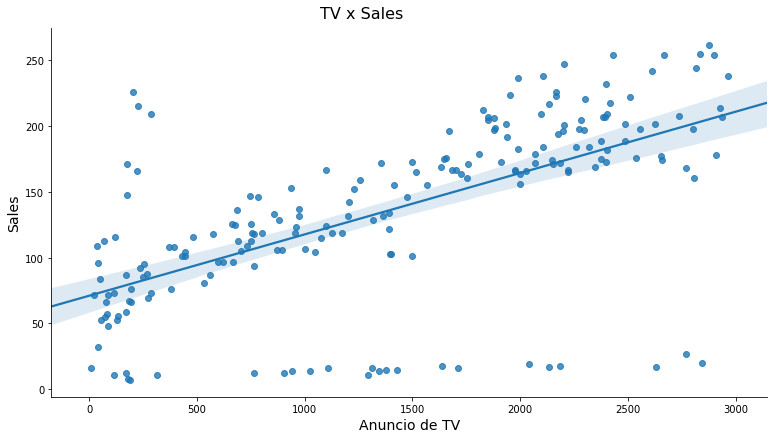

In [18]:
ax = sns.lmplot(x = 'TV', y = 'Sales', data = df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('TV x Sales', fontsize = 16, y = 1.02)
ax.set_xlabels('Anuncio de TV', fontsize = 14)
ax.set_ylabels('Sales', fontsize = 14)


In [19]:
import sklearn
from sklearn import linear_model
model = sklearn.linear_model.LinearRegression()

In [20]:
X = np.c_[df['TV']]
y = np.c_[df['Sales']]

In [21]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Usando um modelo de predição automático para prever o valor investido e retorno em vendas

In [22]:
valor = float(input("Informe o valor a investir US$"))
X_new = [[valor]]
vendasEstimadas = float(model.predict(X_new))
print(f'O valor de retorno em vendas investido será de US${vendasEstimadas:.2f}')

Informe o valor a investir US$5000
O valor de retorno em vendas investido será de US$304.39


Valor manual para cálculo preditivo

In [23]:
from statistics import stdev, mean
def modeloVendas(vp): 
    inclinacao = correlacao * (stdev(df['Sales']) / stdev(df['TV']))
    interceptacao = mean(df['Sales']) - (inclinacao * mean(df['TV']))
    #print(inclinacao)
    #print(interceptacao)
    return interceptacao + (inclinacao * vp)

Informando o valor manualmente também

In [24]:
prever = float(input('Informe o valor a prever para retornar em vendas em US$'))
print(f'O valor de retorno em vendas investido será de US${modeloVendas(prever):.2f}')

Informe o valor a prever para retornar em vendas em US$2000
O valor de retorno em vendas investido será de US$164.41
